# 1. Load data

In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

wd = 'F:\\github\\birds_vis\\'

# Read SoIB csv file
all_birds = pd.read_csv(f'{wd}all_birds.csv')

# Load shapefile of India with states polygons
ind_states = gpd.read_file(f'{wd}IND_state.gpkg')
india = ind_states.to_crs(epsg='24378') # Convert to appropriate CRS

# Exploring dataset
print(set(all_birds['CITES Appendix']))
print(set(all_birds['Endemicity']))
print(set(all_birds['IUCN Category']))
print(set(all_birds['Habitat Specialization']))
print(set(all_birds['SoIB 2023 Priority Status']))

{nan, 'Appendix I', 'Appendix II'}
{'Western Ghats', 'Eastern Andhra Pradesh', 'Western Himalayas', 'Indian Subcontinent', 'Assam Plains', 'Nicobar Islands', 'Andaman and Nicobar Islands', 'Mainland India', 'Northern Myanmar Lowlands', 'Indus Plains', 'Southern Deccan Plateau', 'Western Ghats & Sri Lanka', 'Eastern Himalayas', 'Non-endemic', 'Himalayas', 'Central India', 'Andaman Islands'}
{'Vulnerable', 'Not Recognised', 'Least Concern', 'Critically Endangered', 'Near Threatened', 'Endangered'}
{'Open Habitat', 'Forest', 'Non-specialized', 'Wetland', 'Forest & Plantation', 'Grassland & Scrub', 'Alpine & Cold Desert', 'Grassland'}
{'High', 'Low', 'Moderate'}


In [8]:
state_wise = all_birds.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
state_wise.rename(columns={'Unnamed: 0': 'No of species'}, inplace=True)
state_wise.head()

,source,No of species
0,Andaman and Nicobar Islands,198
1,Andhra Pradesh,411
2,Arunachal Pradesh,594
3,Assam,565
4,Bihar,313


In [10]:
result = pd.merge(india, state_wise, how='left', left_on='STATE', right_on='source')
result.head()

,STATE,geometry,source,No of species
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((5858307.537 -1623337.655, 5858...",Andaman and Nicobar Islands,198
1,Andhra Pradesh,"MULTIPOLYGON (((4534080.843 -433598.636, 45341...",Andhra Pradesh,411
2,Arunachal Pradesh,"MULTIPOLYGON (((5445544.5 926914.481, 5447581....",Arunachal Pradesh,594
3,Assam,"MULTIPOLYGON (((5287108.965 381483.722, 528710...",Assam,565
4,Bihar,"MULTIPOLYGON (((4332554.841 482782.999, 433258...",Bihar,313


# 2. Plot no. of species found in each state or union territory

In [ ]:
all_birds_raw = pd.read_csv(f'{wd}state_trim\\India.csv')
all_birds_raw.head(2)

In [23]:
fig_type = px.bar(result.sort_values(by='No of species', ascending =True),  x ='No of species', y= 'source',
                title= 'State-wise bird count',
                color = 'No of species' , color_continuous_scale=['red','black'], text='No of species')
#Axis titles
fig_type.update_layout(xaxis_title="Species count", yaxis_title='State',
                       font = dict(size=12))
#Remove colorbar
fig_type.update_coloraxes(showscale=False)
# Set the height of the figure to scale
fig_type.update_layout(height=1500)
fig_type.show()

In [26]:
import mapclassify

In [32]:
result['No of species']

0     198
1     411
2     594
3     565
4     313
5     250
6     363
7     337
8     400
9     412
10    447
11    507
12    421
13    299
14    452
15    425
16    272
17     58
18    392
19    459
20    431
21    370
22    308
23    338
24    385
25    235
26    367
27    392
28    452
29    435
30    385
31    301
32    603
33    458
34    693
35    184
36    220
Name: No of species, dtype: int64

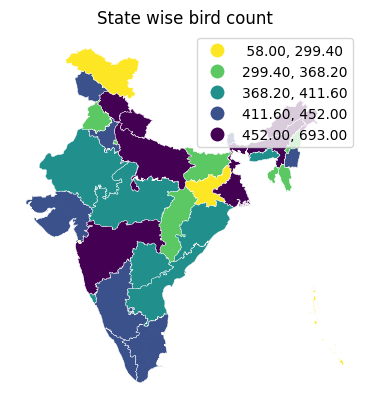

In [31]:
ax = result.plot(column = 'No of species', 
                scheme= 'quantiles', k=5, cmap='viridis_r', 
                legend = True, 
                edgecolor='white', linewidth=0.25)
ax.set_title('State wise bird count')
ax.set_axis_off()
ax.autoscale()
plt.show()


In [34]:
fig = px.choropleth(result, color='No of species',
                           color_continuous_scale="Viridis"
                          )

fig.show()

In [ ]:

# Plot with color bar
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use a single color bar for the entire plot
cax = plt.cm.ScalarMappable(cmap='viridis_r')
cax.set_array(result['Unnamed: 0'])

result.plot(column='Unnamed: 0', 
            scheme='quantiles', k=5, cmap='viridis_r', 
            edgecolor='black', linewidth=0.25, 
            ax=ax, cax=cax)

ax.set_title('Different types of birds in each state as per the State of Indian Birds report 2023')
ax.set_axis_off()
ax.autoscale()

# Set the color bar label
cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
cbar = fig.colorbar(cax, ax=ax, format = '%0.0f')
cbar.set_label('No. of different bird species')

plt.show()



write a function that takes IUCN state type and dispalys the same map as before

In [ ]:
all_birds.head(2)

In [ ]:
def count_plot(df, col, type):
        #df: dataframe to use
        # #col: filter by which column
        # #type: filter for what in col
        
        #filter df by input parameters
        df2 = df[df[col]==type]
        
        #Join with gpkg
        state_wise = df2.groupby('source').count().reset_index()[['source', 'Unnamed: 0']]
        result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')
        
        #make plot
        
        # Plot with color bar
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        # Use a single color bar for the entire plot
        cax = plt.cm.ScalarMappable(cmap='viridis_r')
        cax.set_array(result['Unnamed: 0'])
        
        result.plot(column='Unnamed: 0', 
                        scheme='quantiles', k=5, cmap='viridis_r', 
                        edgecolor='black', linewidth=0.25, 
                        ax=ax, cax=cax)
        
        ax.set_title('Different types of birds in each state as per the State of Indian Birds report 2023')
        ax.set_axis_off()
        ax.autoscale()
        
        # Set the color bar label
        cax.set_clim(result['Unnamed: 0'].min(), result['Unnamed: 0'].max())
        cbar = fig.colorbar(cax, ax=ax, format = '%0.0f')
        cbar.set_label('No. of different bird species')
        
        plt.show()
        


In [ ]:
count_plot(all_birds.head(1000), col='Order', type='Anseriformes')